In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import imutils
import cv2
import pandas as pd
import numpy as np
import sklearn

In [2]:
mnist = fetch_openml(data_id=554) # https://www.openml.org/d/554

In [3]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], 
                                           mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 20);

<IPython.core.display.Javascript object>

In [5]:
def prepare_input(x_train, y_train, x_test, y_test):
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    return x_train, y_train, x_test, y_test


def setup_model(x_train, y_train, x_test, y_test ):
    batch_size = 128
    num_classes = 10
    epochs = 10

    input_shape = (28, 28, 1)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

    hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
    print("The model has successfully trained")

    score = model.evaluate(x_test, y_test, verbose=0)
    

    model.save('mnist.h5')
    print("Saving the model as mnist.h5")

    return score

CNN

In [6]:
# Takes increasingly more images to increase the accuracy
j = 0
column_names = ["percentage_of_test", "accuracies"]
cnn_df = pd.DataFrame(columns = column_names, index = [1, 2, 3, 4, 5, 6, 7, 8, 9])

for test_per in range(10,100,10):
    x_train, x_test, y_train, y_test = train_test_split(np.array(mnist.data),
    mnist.target, test_size=(test_per/100), random_state=42)
    print('Testing with train set size of: ', x_train.shape)
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    x_train, y_train, x_test, y_test = prepare_input(x_train, y_train, x_test, y_test)
    score = setup_model(x_train, y_train, x_test, y_test)
    i = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    new_data_list = [test_per, score[1]]
    cnn_df.loc[i[j]] = new_data_list
    j += 1


Testing with train set size of:  (63000, 784)
(63000, 784) (63000,) (7000, 784) (7000,)
x_train shape: (63000, 28, 28, 1)
63000 train samples
7000 test samples
Epoch 1/10
493/493 [==============================] - 33s 68ms/step - loss: 2.3020 - accuracy: 0.1220 - val_loss: 2.2896 - val_accuracy: 0.2520
Epoch 2/10
493/493 [==============================] - 33s 66ms/step - loss: 2.2882 - accuracy: 0.1493 - val_loss: 2.2736 - val_accuracy: 0.3554
Epoch 3/10
493/493 [==============================] - 34s 68ms/step - loss: 2.2737 - accuracy: 0.1846 - val_loss: 2.2565 - val_accuracy: 0.4104
Epoch 4/10
493/493 [==============================] - 34s 68ms/step - loss: 2.2579 - accuracy: 0.2140 - val_loss: 2.2382 - val_accuracy: 0.4469
Epoch 5/10
493/493 [==============================] - 39s 79ms/step - loss: 2.2403 - accuracy: 0.2441 - val_loss: 2.2174 - val_accuracy: 0.4759
Epoch 6/10
493/493 [==============================] - 36s 73ms/step - loss: 2.2221 - accuracy: 0.2696 - val_loss: 2.1936

274/274 [==============================] - 23s 84ms/step - loss: 2.2182 - accuracy: 0.2395 - val_loss: 2.1908 - val_accuracy: 0.4123
The model has successfully trained
Saving the model as mnist.h5
Testing with train set size of:  (28000, 784)
(28000, 784) (28000,) (42000, 784) (42000,)
x_train shape: (28000, 28, 28, 1)
28000 train samples
42000 test samples
Epoch 1/10
219/219 [==============================] - 20s 92ms/step - loss: 2.3089 - accuracy: 0.1058 - val_loss: 2.2995 - val_accuracy: 0.1214
Epoch 2/10
219/219 [==============================] - 21s 94ms/step - loss: 2.3032 - accuracy: 0.1123 - val_loss: 2.2931 - val_accuracy: 0.1266
Epoch 3/10
219/219 [==============================] - 20s 91ms/step - loss: 2.2955 - accuracy: 0.1183 - val_loss: 2.2869 - val_accuracy: 0.1333
Epoch 4/10
219/219 [==============================] - 20s 93ms/step - loss: 2.2907 - accuracy: 0.1276 - val_loss: 2.2808 - val_accuracy: 0.1423
Epoch 5/10
219/219 [==============================] - 20s 91ms/s

   percentage_of_test accuracies
1                  90   0.543571
2                  80   0.339357
3                  70   0.412714
4                  60   0.296393
5                  50   0.412314
6                  40   0.193905
7                  30   0.230286
8                  20   0.182607
9                  10   0.195333


<IPython.core.display.Javascript object>


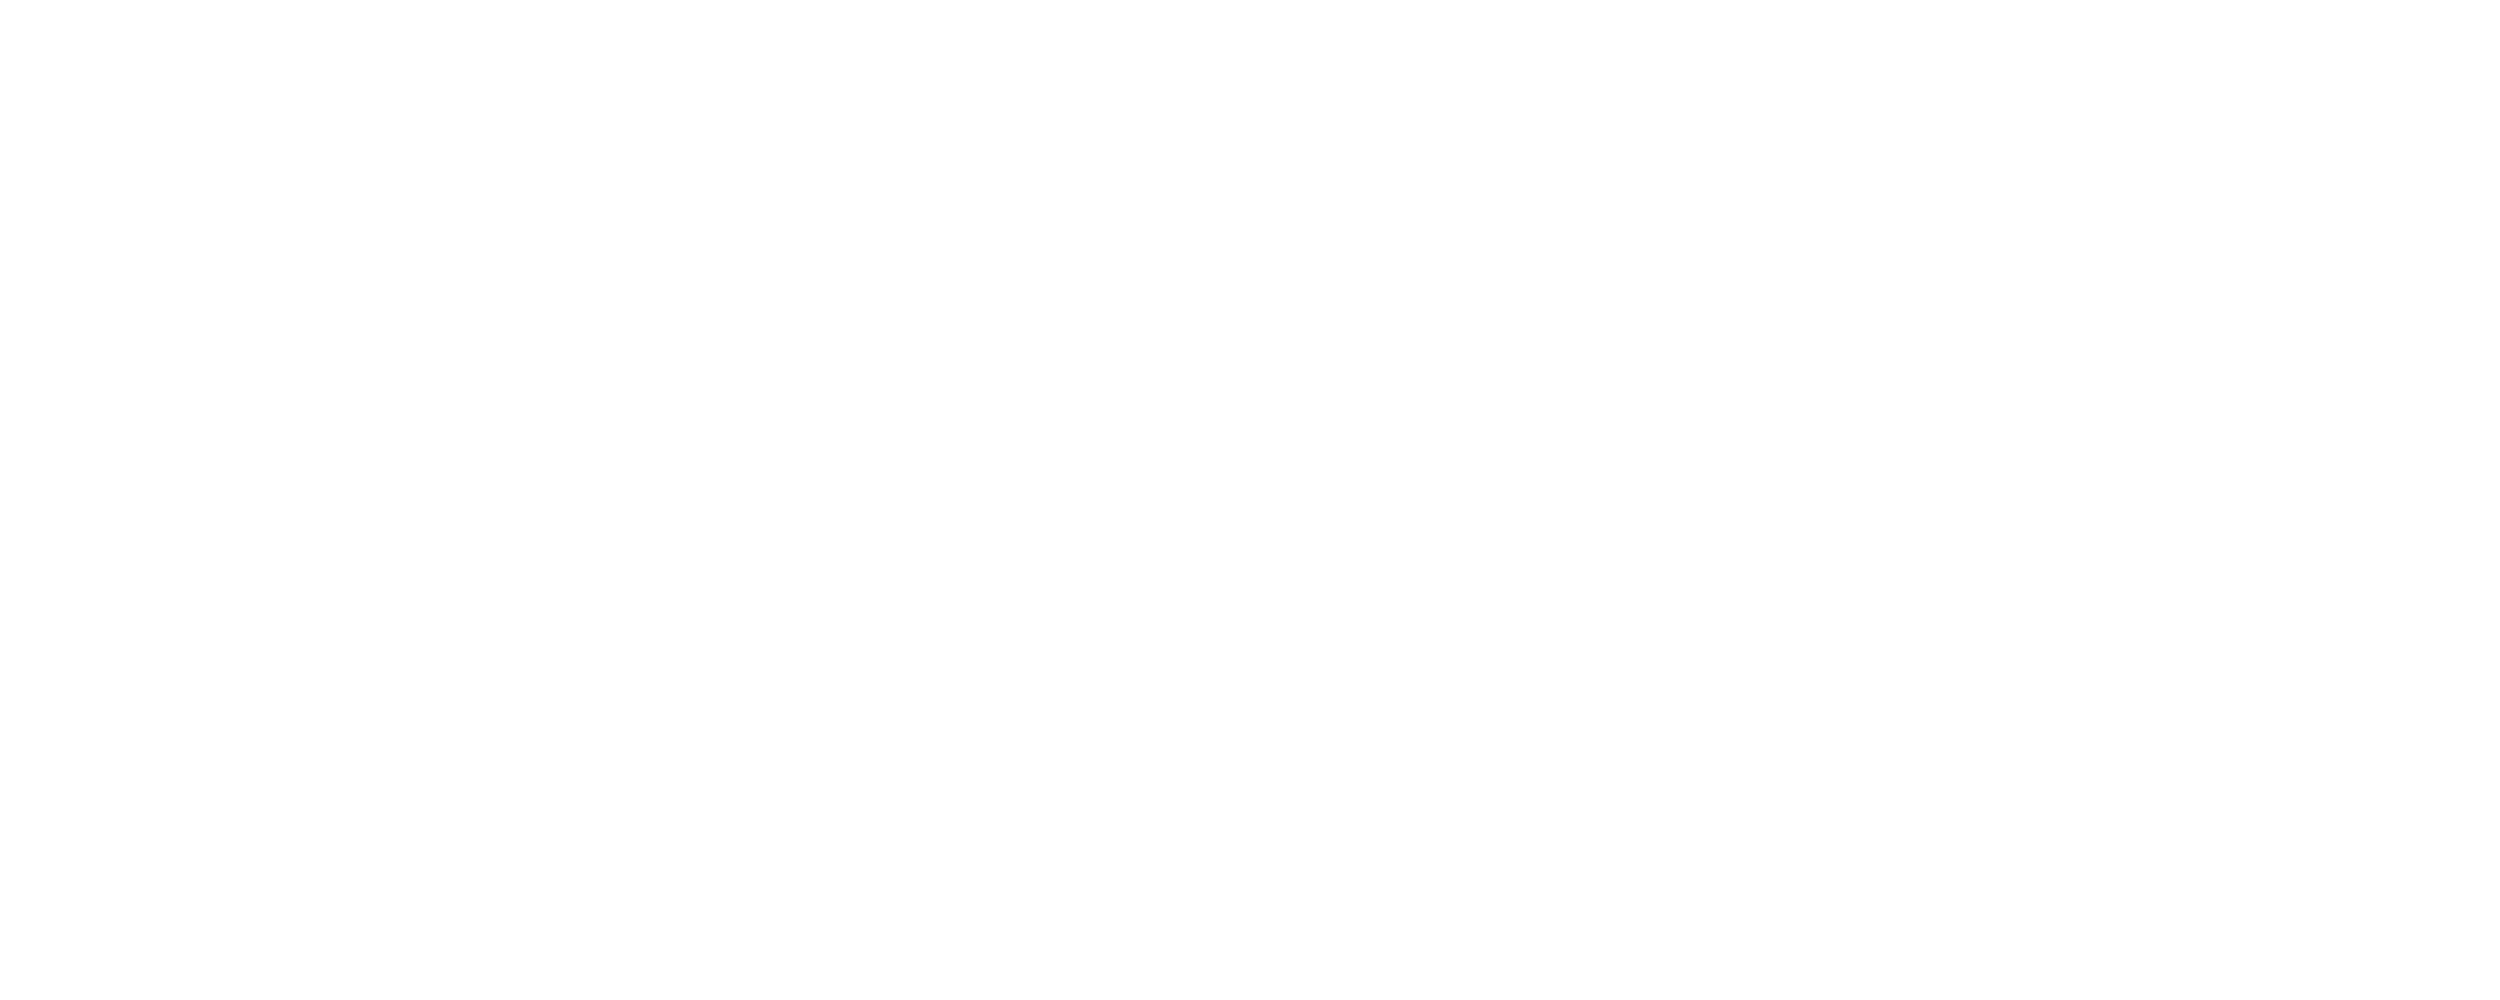

In [7]:
temp_cnn_df = cnn_df
temp_cnn_df.drop('percentage_of_test', inplace=True, axis=1)
temp_cnn_df.insert(0, "percentage_of_test", [90,80,70,60,50,40,30,20,10], True) 



print(temp_cnn_df)
line_graph = temp_cnn_df.plot(kind='line',x='percentage_of_test',y='accuracies',color='red',  xticks=[90,80,70,60,50,40,30,20,10], 
        yticks=[0,1], figsize=(25,10))
line_graph.set(title="How changing the amount of Training data impacts the accuracy - Logistic Regression", xlabel="Percent of images that are test images", ylabel="Accuracy in decimal(%)")
plt.show()

Logistics

In [8]:
#logistic regression

j = 0
column_names = ["percentage_of_test", "accuracies"]
logistic_df = pd.DataFrame(columns = column_names, index = [1, 2, 3, 4, 5, 6, 7, 8, 9])


for test_per in range(10,100,10):
    from sklearn.model_selection import train_test_split
    X2_train, X2_test, y2_train, y2_test = train_test_split(mnist.data, 
                                                        mnist.target.astype('int'), #targets str to int convert
                                                       test_size=(test_per/100),
                                                       random_state=0)


    from sklearn.linear_model import LogisticRegression
    clf2 = LogisticRegression(fit_intercept=True,
                            multi_class='auto',
                            penalty='l1', #lasso regression
                            solver='saga',
                            max_iter=100,
                            C=50,
                            verbose=1, # output progress
                            n_jobs=5, # parallelize over 5 processes
                            tol=0.01
                             )
    clf2


    clf2.fit(X2_train, y2_train)

    clf2.score(X2_train, y2_train) # training score
    score2 = clf2.score(X2_test, y2_test) # test score
    i = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    new_data_list = [test_per, score2]
    logistic_df.loc[i[j]] = new_data_list
    j += 1

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 53 epochs took 429 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  7.1min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 48 epochs took 342 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  5.7min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 45 epochs took 282 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  4.7min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 39 epochs took 209 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  3.5min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 32 epochs took 141 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  2.4min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 42 epochs took 152 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  2.5min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 41 epochs took 108 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 40 epochs took 70 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 49 epochs took 43 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:   42.9s finished


In [9]:
temp_logistic_df = logistic_df
temp_logistic_df.drop('percentage_of_test', inplace=True, axis=1)
temp_logistic_df.insert(0, "percentage_of_test", [90,80,70,60,50,40,30,20,10], True) 



print(temp_logistic_df)
line_graph = temp_logistic_df.plot(kind='line',x='percentage_of_test',y='accuracies',color='red',  xticks=[90,80,70,60,50,40,30,20,10], 
        yticks=[0.93,0.99], figsize=(25,10))
line_graph.set(title="How changing the amount of Training data impacts the accuracy - Logistic Regression", xlabel="Percent of images that are test images", ylabel="Accuracy in decimal(%)")
plt.show()

   percentage_of_test accuracies
1                  90   0.921857
2                  80   0.917071
3                  70   0.918714
4                  60   0.916393
5                  50   0.917743
6                  40    0.91769
7                  30   0.916816
8                  20   0.910125
9                  10   0.899698


<IPython.core.display.Javascript object>

KNN

In [10]:
mnist = datasets.load_digits()

In [11]:
column_names = ["percentage_of_test", "accuracies"]
knn_df = pd.DataFrame(columns = column_names)
row_list = []

for test_per in range(10,100,10):
    (trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
        mnist.target, test_size=(test_per/100), random_state=42)

    # initialize the values of k for our k-Nearest Neighbor classifier along with the
    # list of accuracies for each value of k
    kVals = range(1, 30, 2)
    accuracies = []
    percentages = []
    
    # loop over various values of `k` for the k-Nearest Neighbor classifier
    for k in range(1, 30, 10):
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(trainData, trainLabels)
        
        # evaluate the model and update the accuracies list
        score = model.score(testData, testLabels)
        
        row = {}
        row[column_names[0]] = (test_per) 
        row[column_names[1]] = (score * 100) 
        print("k=%d, dict=%", k, row)
        row_list.append(row)        

knn_df = knn_df.append(row_list)

k=%d, dict=% 1 {'percentage_of_test': 10, 'accuracies': 98.33333333333333}
k=%d, dict=% 11 {'percentage_of_test': 10, 'accuracies': 98.88888888888889}
k=%d, dict=% 21 {'percentage_of_test': 10, 'accuracies': 99.44444444444444}
k=%d, dict=% 1 {'percentage_of_test': 20, 'accuracies': 97.77777777777777}
k=%d, dict=% 11 {'percentage_of_test': 20, 'accuracies': 98.33333333333333}
k=%d, dict=% 21 {'percentage_of_test': 20, 'accuracies': 97.5}
k=%d, dict=% 1 {'percentage_of_test': 30, 'accuracies': 98.33333333333333}
k=%d, dict=% 11 {'percentage_of_test': 30, 'accuracies': 97.96296296296296}
k=%d, dict=% 21 {'percentage_of_test': 30, 'accuracies': 97.22222222222221}
k=%d, dict=% 1 {'percentage_of_test': 40, 'accuracies': 98.74826147426981}
k=%d, dict=% 11 {'percentage_of_test': 40, 'accuracies': 98.0528511821975}
k=%d, dict=% 21 {'percentage_of_test': 40, 'accuracies': 96.80111265646731}
k=%d, dict=% 1 {'percentage_of_test': 50, 'accuracies': 98.33147942157953}
k=%d, dict=% 11 {'percentage_of

In [12]:
knn_df = knn_df.drop_duplicates(subset=['percentage_of_test'])

In [13]:
temp_knn_df = knn_df
temp_knn_df.drop('percentage_of_test', inplace=True, axis=1)
temp_knn_df.insert(0, "percentage_of_test", [90,80,70,60,50,40,30,20,10], True) 
print(temp_knn_df)

line_graph = temp_knn_df.plot(kind='line',x='percentage_of_test',y='accuracies',color='red',  xticks=[10,20,30,40,50,60,70,80,90], 
        yticks=[0,1], figsize=(25,10))
line_graph.set(title="How changing the amount of Training data impacts the accuracy - Logistic Regression", xlabel="Percent of images that are test images", ylabel="Accuracy in decimal(%)")
plt.show()

    percentage_of_test  accuracies
0                   90   98.333333
3                   80   97.777778
6                   70   98.333333
9                   60   98.748261
12                  50   98.331479
15                  40   98.146432
18                  30   97.853736
21                  20   96.662031
24                  10   93.881335


<IPython.core.display.Javascript object>

Random Forrest

In [15]:
data = pd.read_csv("train.csv")

X = data.iloc[:, 1:]
y = data['label']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

j = 0
column_names = ["percentage_of_test", "accuracies"]
forrest_df = pd.DataFrame(columns = column_names, index = [1, 2, 3, 4, 5, 6, 7, 8, 9])

for test_per in range(10,100,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(test_per/100), random_state=42)

    rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    
    summary_values = {(test_per*100):score}
    i = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    new_data_list = [test_per, score]
    forrest_df.loc[i[j]] = new_data_list
    j += 1

   percentage_of_test accuracies
1                  90   0.943571
2                  80   0.937024
3                  70    0.93619
4                  60    0.93256
5                  50   0.928762
6                  40   0.922063
7                  30   0.918061
8                  20   0.904345
9                  10   0.877725


<IPython.core.display.Javascript object>


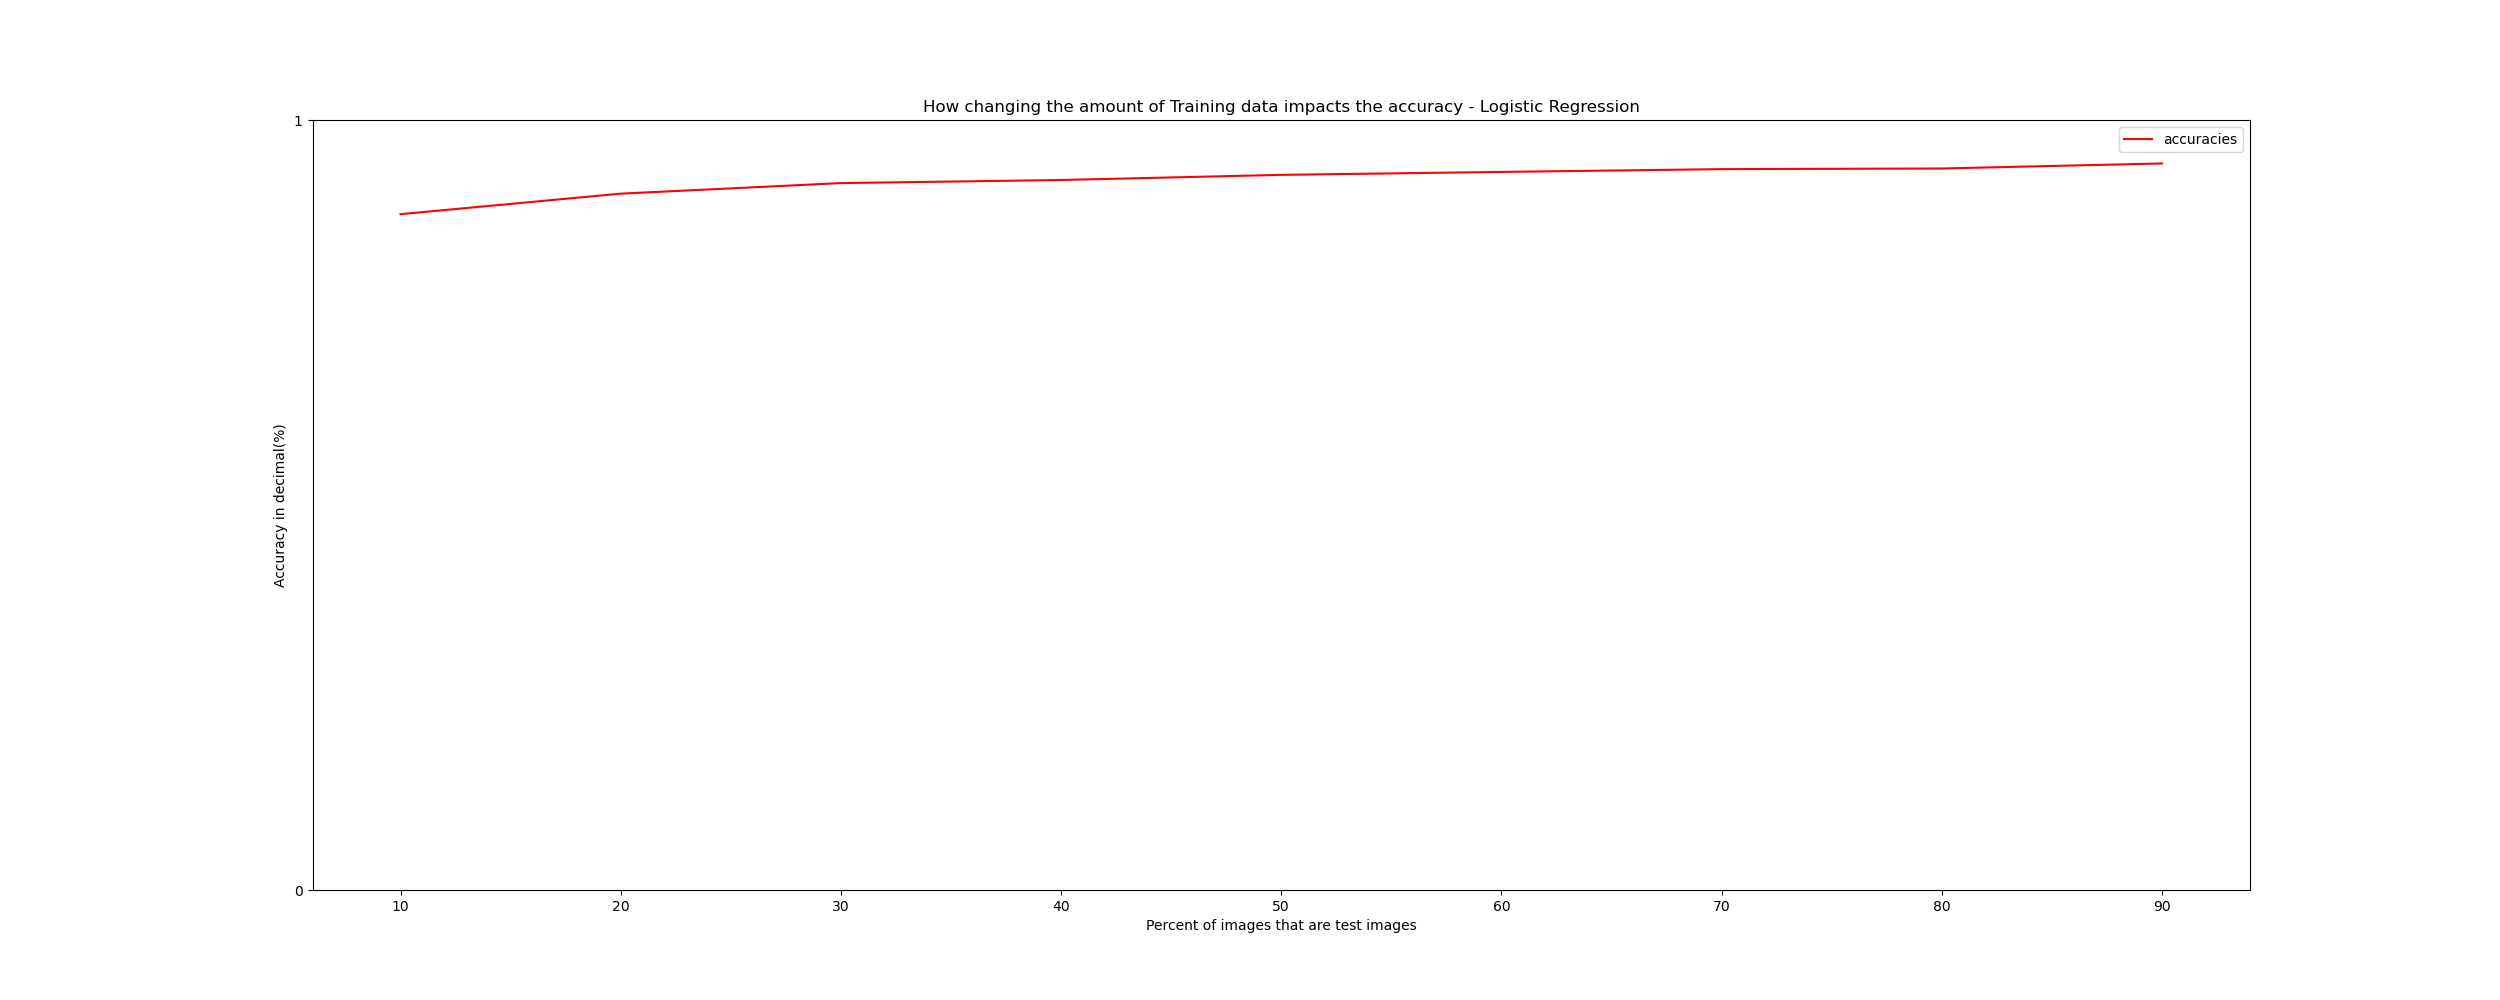

In [16]:
temp_forrest_df = forrest_df
temp_forrest_df.drop('percentage_of_test', inplace=True, axis=1)
temp_forrest_df.insert(0, "percentage_of_test", [90,80,70,60,50,40,30,20,10], True) 

print(temp_forrest_df)
line_graph = temp_forrest_df.plot(kind='line',x='percentage_of_test',y='accuracies',color='red',  xticks=[90,80,70,60,50,40,30,20,10], 
        yticks=[0,1], figsize=(25,10))
line_graph.set(title="How changing the amount of Training data impacts the accuracy - Logistic Regression", xlabel="Percent of images that are test images", ylabel="Accuracy in decimal(%)")
plt.show()

In [19]:
print("Data table for the convolutional neural network algorithm")
print(temp_cnn_df)
print("Data table for the logistic regression algorithm")
print(temp_logistic_df)
print("Data table for the K nearest neighbor algorithm")
print(temp_knn_df)
print("Data table for the random forrest algorithm")
print(temp_forrest_df)

Data table for the convolutional neural network algorithm
   percentage_of_test accuracies
1                  90   0.543571
2                  80   0.339357
3                  70   0.412714
4                  60   0.296393
5                  50   0.412314
6                  40   0.193905
7                  30   0.230286
8                  20   0.182607
9                  10   0.195333
Data table for the logistic regression algorithm
   percentage_of_test accuracies
1                  90   0.921857
2                  80   0.917071
3                  70   0.918714
4                  60   0.916393
5                  50   0.917743
6                  40    0.91769
7                  30   0.916816
8                  20   0.910125
9                  10   0.899698
Data table for the K nearest neighbor algorithm
    percentage_of_test  accuracies
0                   90   98.333333
3                   80   97.777778
6                   70   98.333333
9                   60   98.748261
12        

<IPython.core.display.Javascript object>


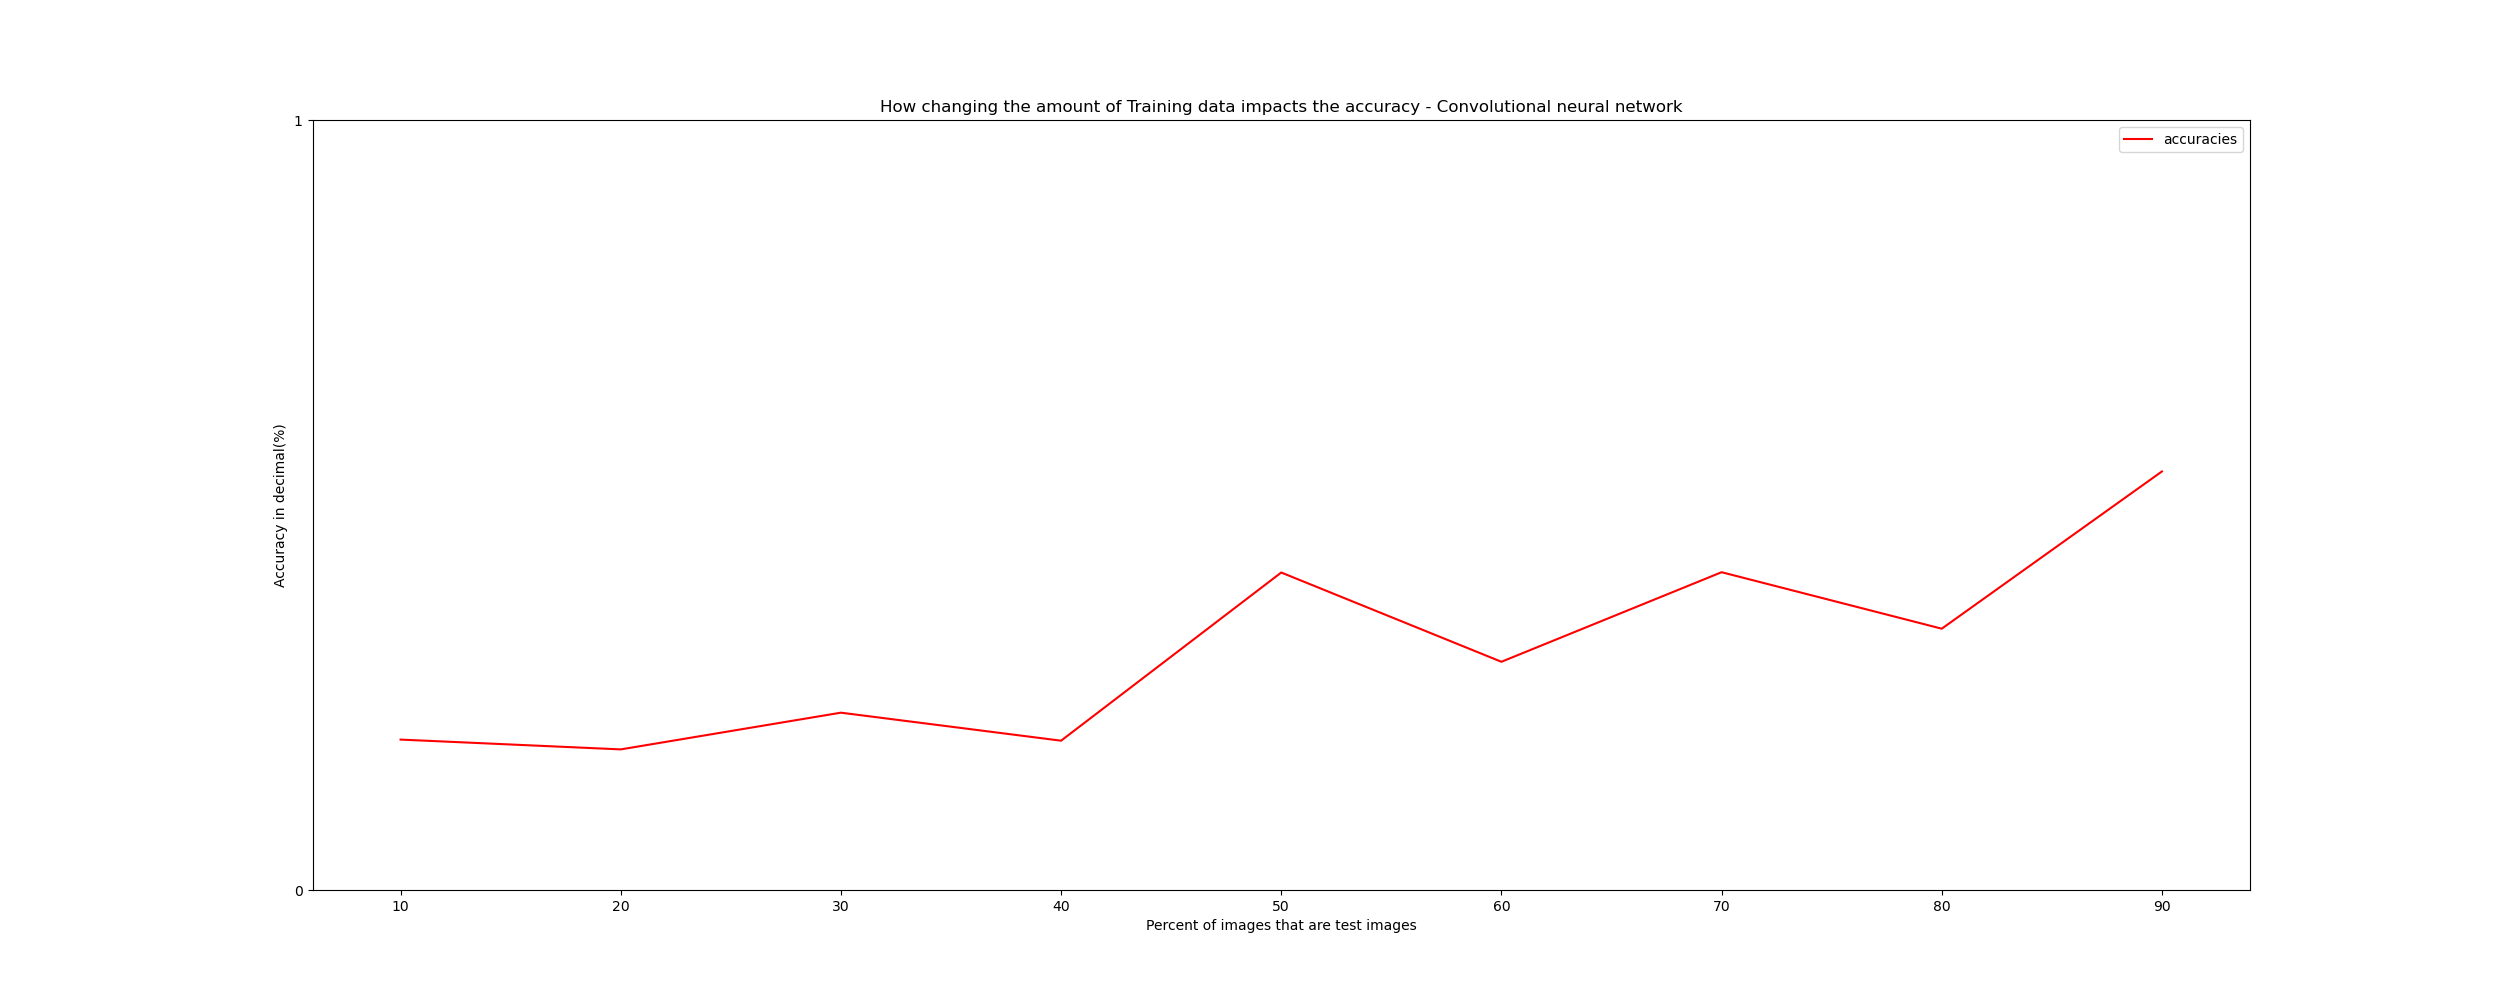

<IPython.core.display.Javascript object>


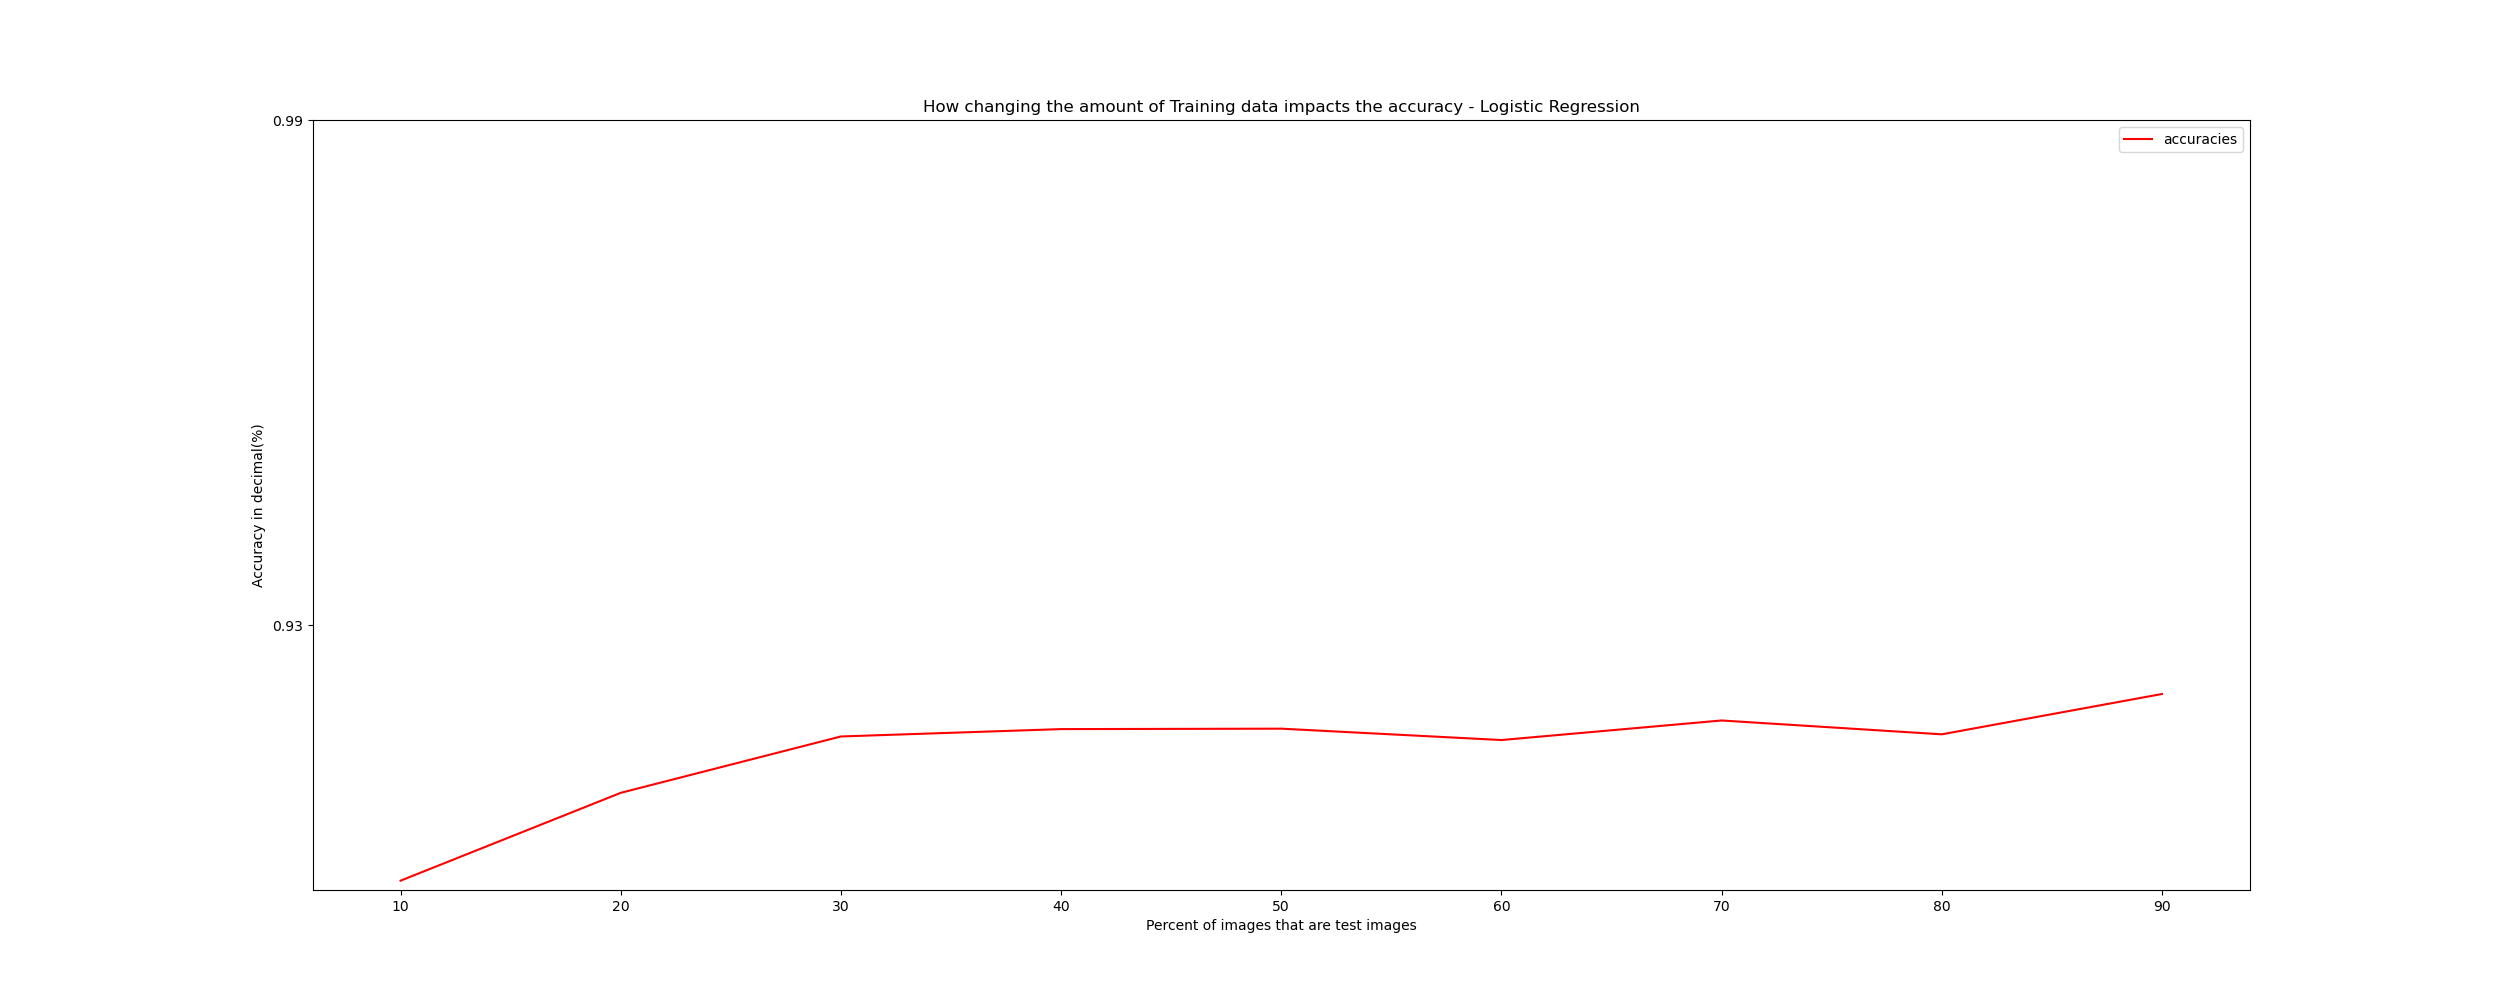

<IPython.core.display.Javascript object>


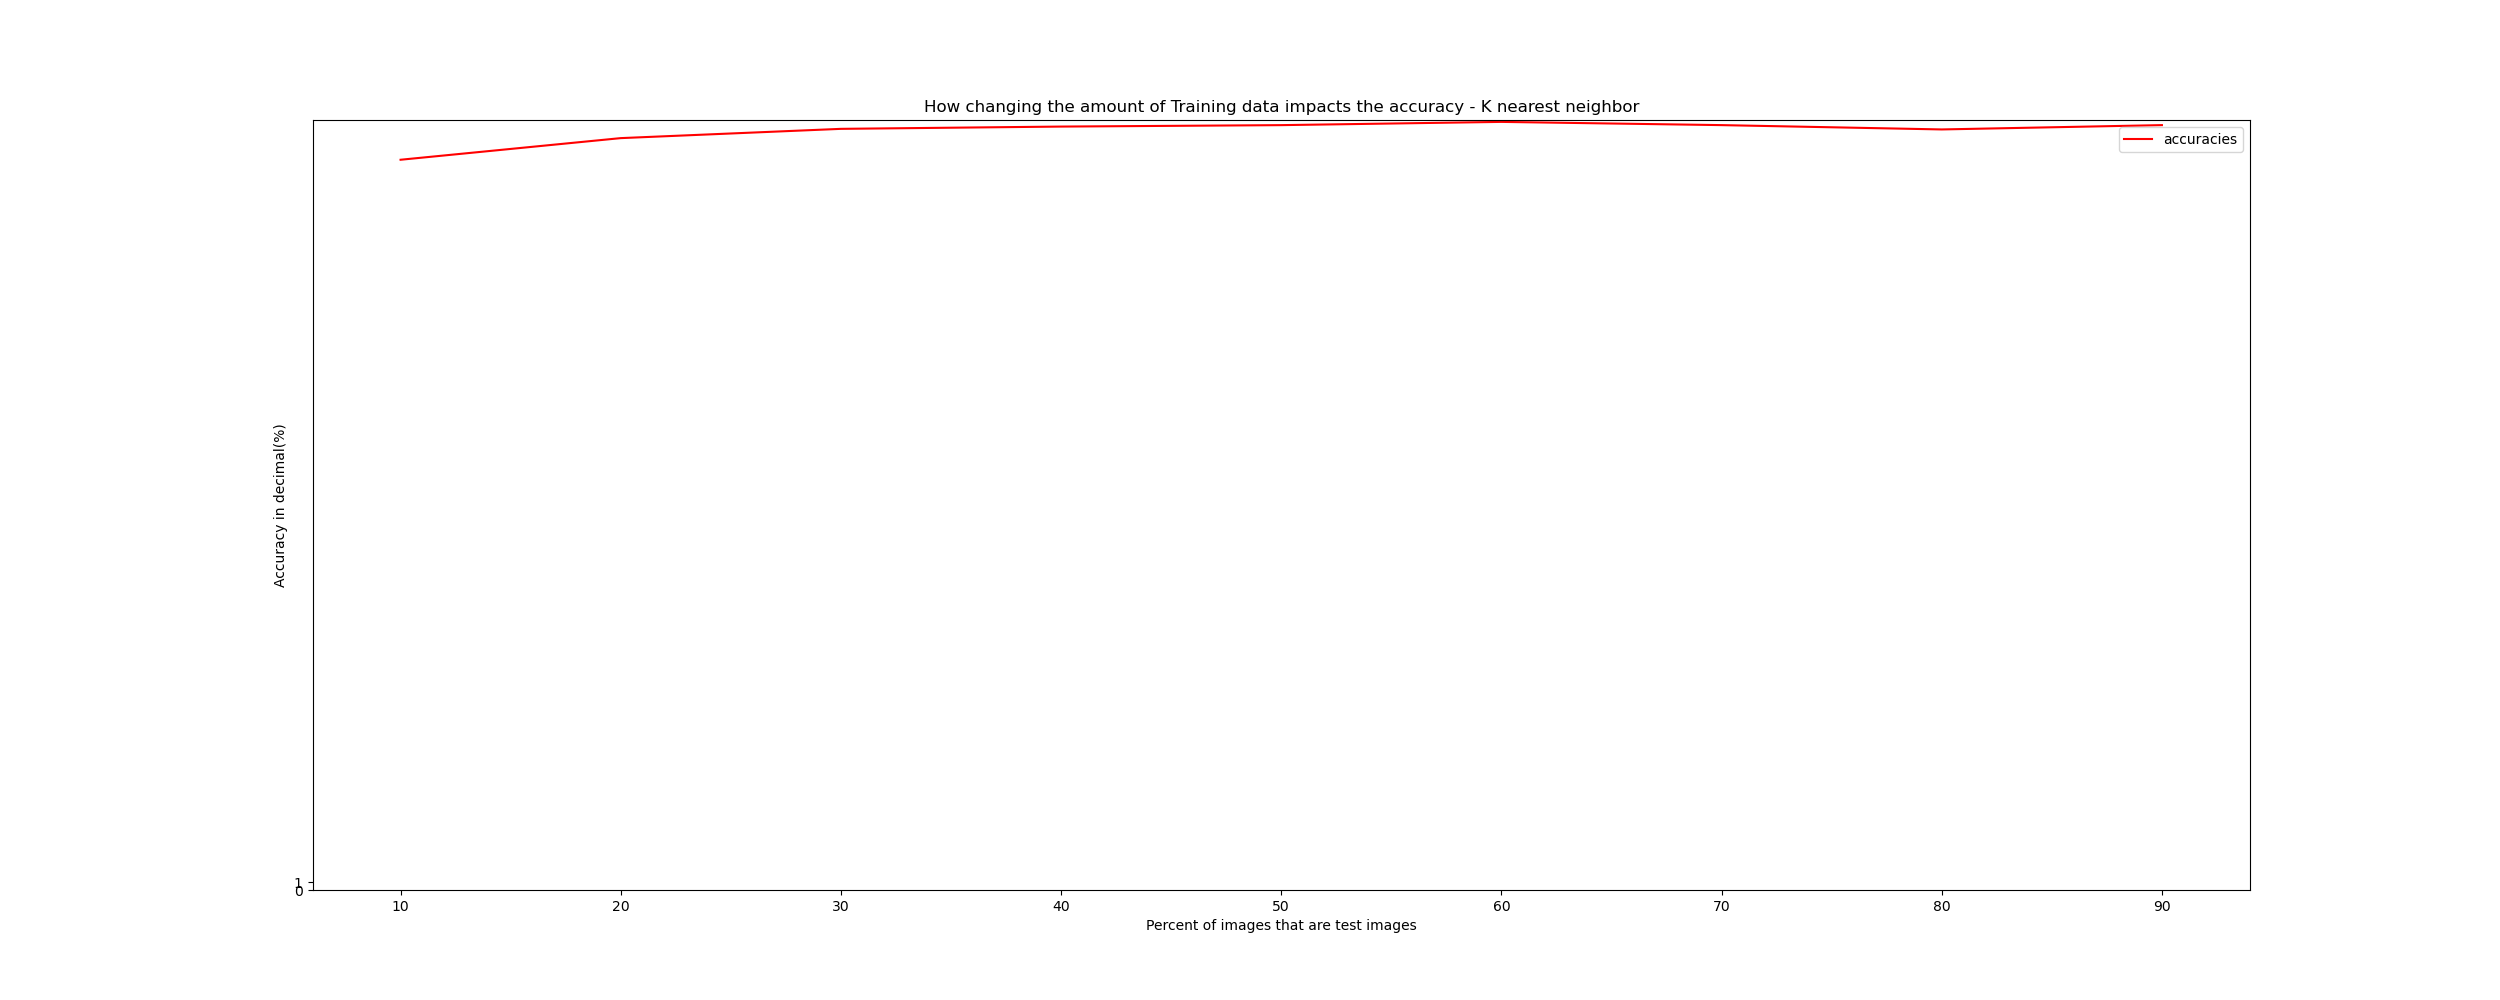

<IPython.core.display.Javascript object>


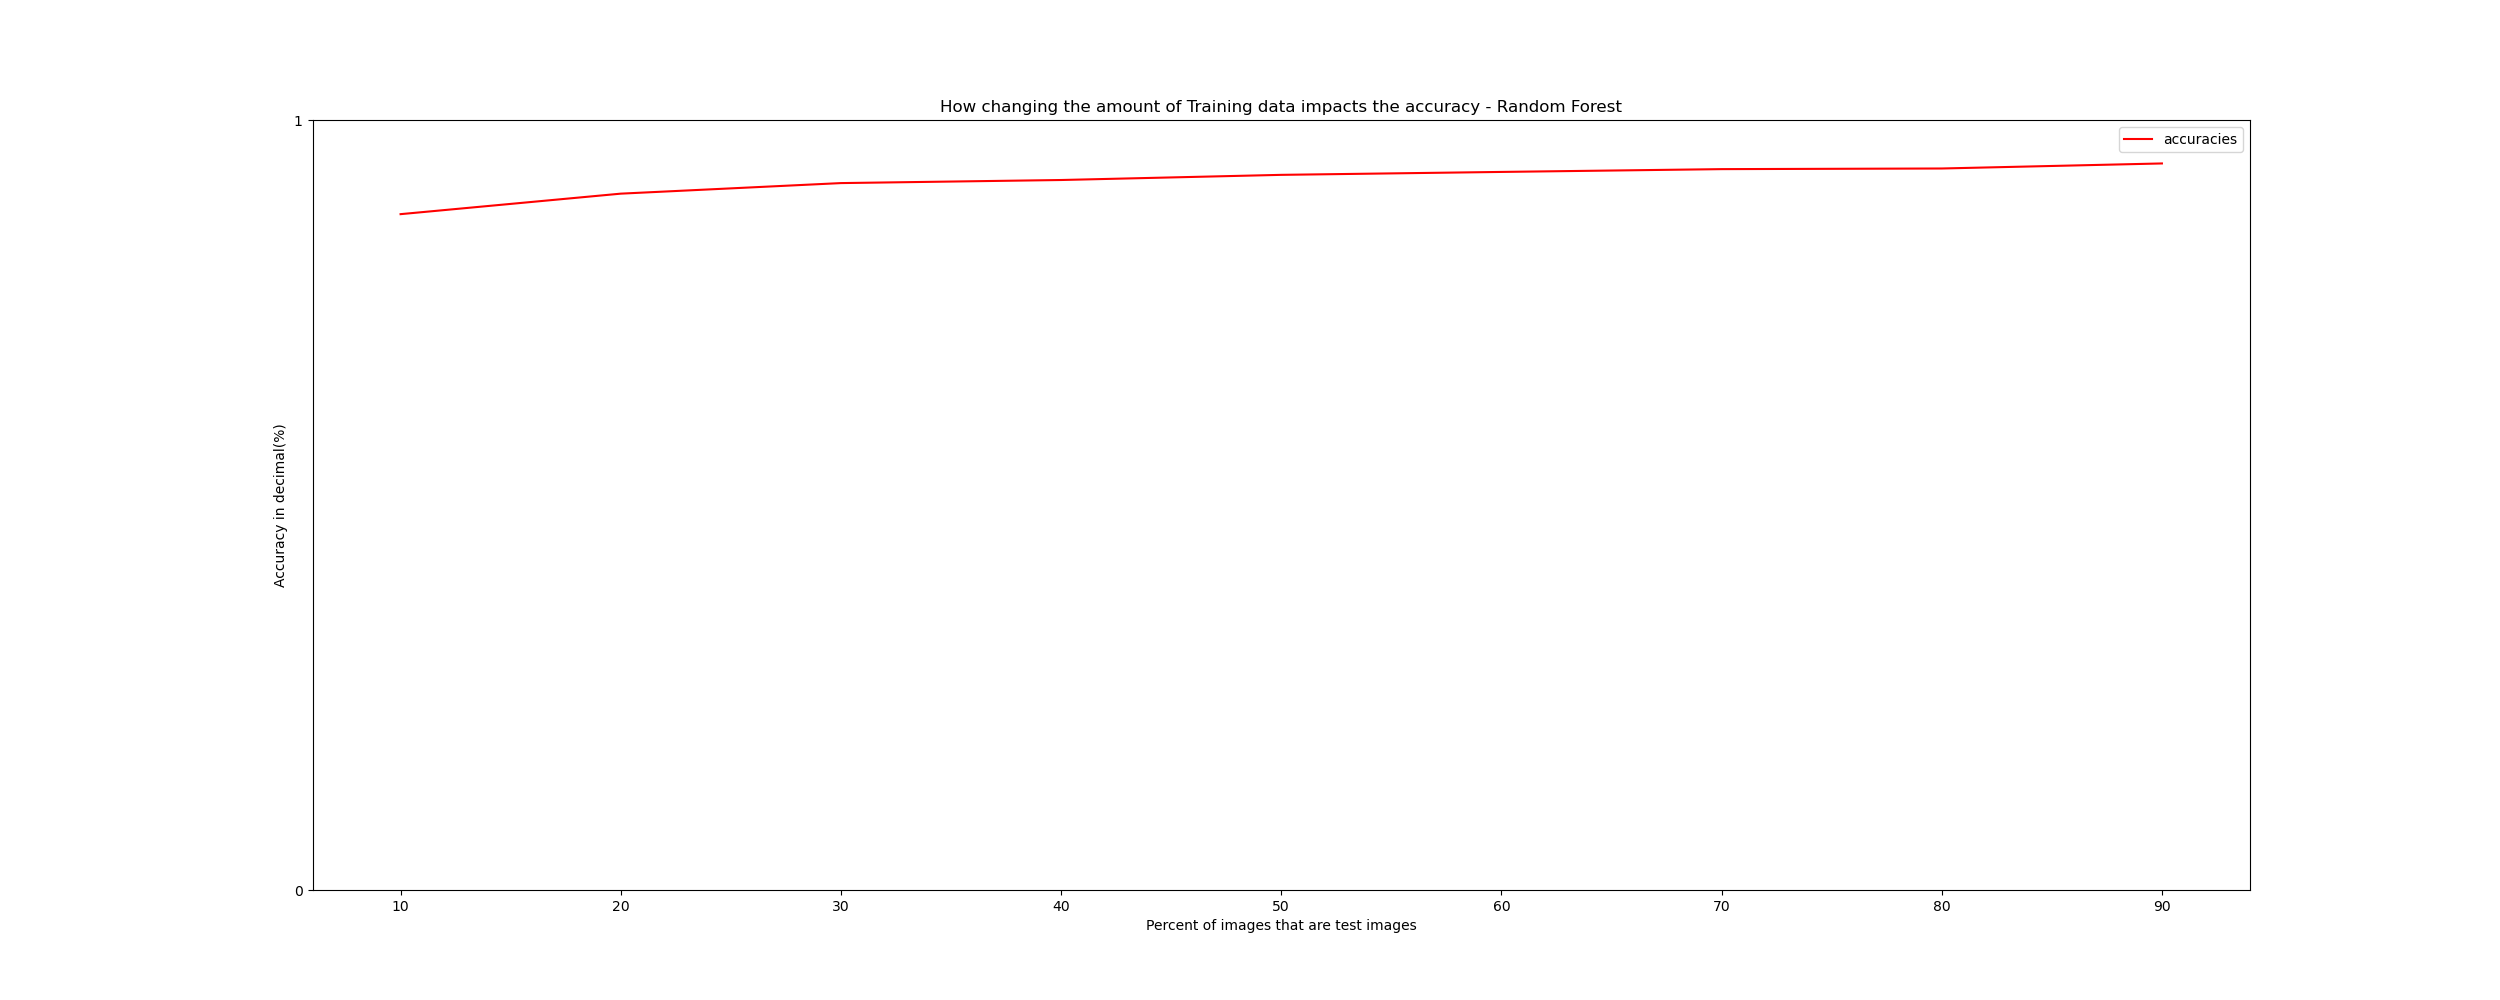

In [20]:
line_graph = temp_cnn_df.plot(kind='line',x='percentage_of_test',y='accuracies',color='red',  
        xticks=[90,80,70,60,50,40,30,20,10], 
        yticks=[0,1], figsize=(25,10))
line_graph.set(title="How changing the amount of Training data impacts the accuracy - Convolutional neural network", 
               xlabel="Percent of images that are test images", ylabel="Accuracy in decimal(%)")
plt.show()

line_graph = temp_logistic_df.plot(kind='line',x='percentage_of_test',y='accuracies',color='red',  
            xticks=[90,80,70,60,50,40,30,20,10], 
        yticks=[0.93,0.99], figsize=(25,10))
line_graph.set(title="How changing the amount of Training data impacts the accuracy - Logistic Regression", 
               xlabel="Percent of images that are test images", ylabel="Accuracy in decimal(%)")
plt.show()


line_graph = temp_knn_df.plot(kind='line',x='percentage_of_test',y='accuracies',color='red',  
            xticks=[10,20,30,40,50,60,70,80,90], 
        yticks=[0,1], figsize=(25,10))
line_graph.set(title="How changing the amount of Training data impacts the accuracy - K nearest neighbor", 
               xlabel="Percent of images that are test images", ylabel="Accuracy in decimal(%)")
plt.show()

line_graph = temp_forrest_df.plot(kind='line',x='percentage_of_test',y='accuracies',color='red',  
            xticks=[90,80,70,60,50,40,30,20,10], 
        yticks=[0,1], figsize=(25,10))
line_graph.set(title="How changing the amount of Training data impacts the accuracy - Random Forest", 
               xlabel="Percent of images that are test images", ylabel="Accuracy in decimal(%)")
plt.show()